In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

metadata = dict(title='SuperNova', artist='Tab')
writer = FFMpegWriter(fps=40, metadata=metadata, bitrate=200000) 

E = 1 
A = 1
p_inf = 1
d = 3 

time_span = 500

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,20)) 

def R(t, p_inf,E):  # OUR RADIUS EQUATION
    return ((E * t**2) / (A * p_inf))**(1/(d+2))


with writer.saving(fig, "SupernovaTD.mp4", dpi=200):
    for t in range(time_span):
        #### Base circle
        ax1.clear()
        Drawing_uncolored_circle = plt.Circle( (0.6, 0.6), R(t, 1, 1) , fill = False, color = 'blue', label='Base Circle')
        ax1.set_aspect( 1 )
        ax1.add_artist(  Drawing_uncolored_circle )
        ax1.set_xlim(-20, 20)
        ax1.set_ylim(-20, 20)
        ax1.set_title("Density=1 and Energy = 1")
        ###### changing P = 10
        ax2.clear()    
        Drawing_uncolored_circle2 = plt.Circle( (0.6, 0.6), R(t, 10,1) ,fill=False,color='green',label='Higher Density' )
        ax2.set_aspect( 1 )
        ax2.add_artist(  Drawing_uncolored_circle2 )
        ax2.set_xlim(-20, 20)
        ax2.set_ylim(-20, 20)
        ax2.set_title("Density=10 and Energy = 1")
        
        ##### changing E = 10
        ax3.clear()    
        Drawing_uncolored_circle3 = plt.Circle( (0.6, 0.6), R(t,1,10) , fill = False, color = 'red', label = 'Higher Energy')
        ax3.set_aspect( 1 )
        ax3.add_artist(  Drawing_uncolored_circle3 )
        ax3.set_xlim(-20, 20)
        ax3.set_ylim(-20, 20)
        ax3.set_title("Density=1 and Energy = 10")
      
       

        fig.tight_layout()
        plt.draw()
        plt.pause(0.5)
        writer.grab_frame()
        plt.legend()

# Getting light curves (we attempted to do light curves so here's the codes even though it's incorrect?

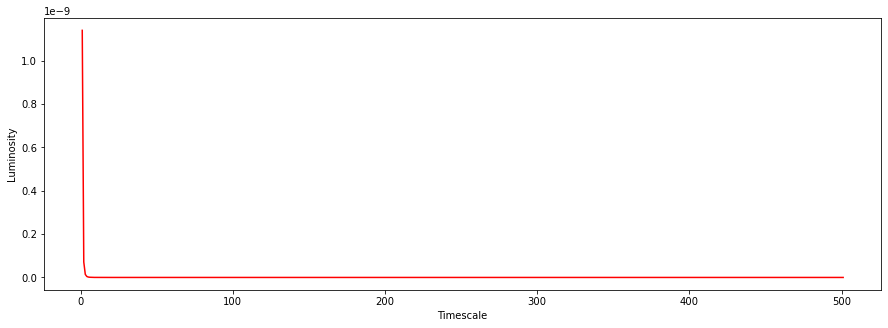

In [6]:
def Z(γ):
    return (2*γ*(γ - 1)) / (γ+1)**2 
Z_1 = Z(5/3)

μ = 1
σ = 5.67e-8
t = np.linspace(1,501,500)
temps = []
Lum = []
Rad = []
inner_rad = []


def R(t):
    return ((E * t**2) / (A * p_inf))**(1/(d+2))

def T(r,t):
    return μ*((r**2) / t**2) * Z_1 * (r / R(t))

def L(R,T):
    return 4*np.pi*R**2 * σ * (T**4)

for i in range(1,501):
    R_vals = R(i)
    r = R(i) - R(i)/5
    Rad.append(R_vals)
    inner_rad.append(r)
    T_vals = T(r,i)
    temps.append(T_vals)
    L_vals = L(R_vals,T_vals)
    Lum.append(L_vals)

plt.figure(figsize =(15,5))
plt.plot(t,Lum,color = 'red')
plt.xlabel('Timescale')
plt.ylabel('Luminosity');



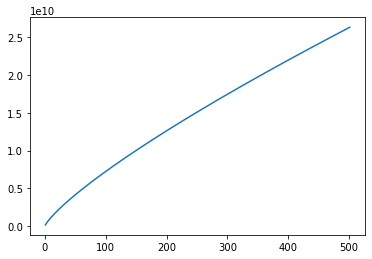

In [3]:
fd = []
gas = 4000
def L(R):
    return 4*np.pi*R**2 * σ * (gas**4)


for i in range(1,501):
    circle = R(i)
    rep = L(circle)
    fd.append(rep)
plt.plot(t,fd)